In [34]:
%matplotlib inline

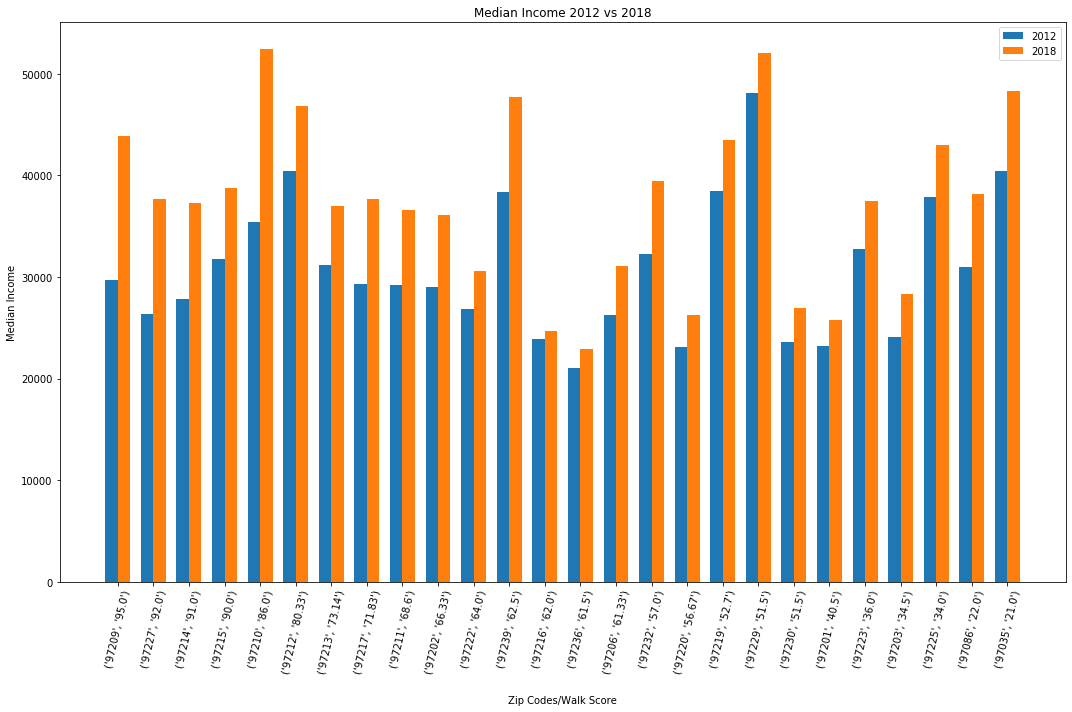

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

frankzippas = pd.read_csv('CSVs/census_walkscore_by_zip.csv')
dweezilzippas = frankzippas.sort_values('Walk Score', ascending=False).reset_index(drop=True)

zippas = dweezilzippas['Zipcode']
zippascore = round(dweezilzippas['Walk Score'], 2)
med_inc_12 = dweezilzippas['Median Income 2012']
med_inc_18 = dweezilzippas['Median Income 2018']

zip_score = [str(i) for i in zippas]
score_zip = [str(i) for i in zippascore]

zippa_scores = zip(zip_score, score_zip)

width = 0.35
x = np.arange(len(zippas))

fig, ax = plt.subplots(figsize=(15,10))
bars1 = ax.bar(x - width/2, med_inc_12, width, label='2012')
bars2 = ax.bar(x + width/2, med_inc_18, width, label='2018')

ax.set_ylabel('Median Income')
ax.set_title('Median Income 2012 vs 2018')
ax.set_xticks(x)
ax.set_xlabel('Zip Codes/Walk Score', labelpad=20)
ax.set_xticklabels(zippa_scores)
ax.tick_params('x', labelrotation=77)
ax.legend()

fig.tight_layout()
plt.show()

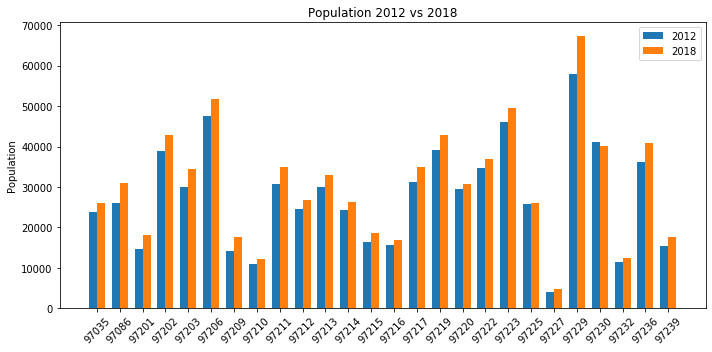

In [10]:
poppas = frankzippas['Zipcode']
med_inc_12 = frankzippas['Population 2012']
med_inc_18 = frankzippas['Population 2018']

width = 0.35
x = np.arange(len(poppas))

fig, ax = plt.subplots(figsize=(10,5))
bars1 = ax.bar(x - width/2, med_inc_12, width, label='2012')
bars2 = ax.bar(x + width/2, med_inc_18, width, label='2018')

ax.set_ylabel('Population')
ax.set_title('Population 2012 vs 2018')
ax.set_xticks(x)
ax.set_xticklabels(poppas)
ax.tick_params('x', labelrotation=45)
ax.legend()

fig.tight_layout()
plt.show()